In [42]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [43]:
dataset = pd.read_csv("tempo.csv", sep=";")
print(dataset)

   Aparencia  Temperatura  Umidade       Vento Jogar
0        sol           85     85.0       FALSO   nao
1        sol           80     90.0  VERDADEIRO   nao
2    nublado           83     86.0       FALSO   sim
3      chuva           70      NaN       FALSO   sim
4      chuva           68     80.0       FALSO   sim
5      chuva           65     70.0  VERDADEIRO   nao
6      menos           64     65.0  VERDADEIRO   sim
7        sol         1220     95.0       FALSO   nao
8        sol           69     70.0       FALSO   sim
9      chuva           75    200.0         NaN   sim
10       sol           75     70.0  VERDADEIRO   sim
11   nublado           72     90.0  VERDADEIRO   sim
12   nublado           81     75.0       FALSO   sim
13     chuva           71     91.0  VERDADEIRO   nao


In [44]:
print(dataset.shape)

(14, 5)


In [71]:
agrupado = dataset.groupby(["Aparencia"]).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [72]:
dataset.isna().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [73]:
dataset["Umidade"].describe()

count    14.000000
mean     81.267857
std       9.576847
min      65.000000
25%      71.250000
50%      85.125000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [48]:
mediana = sts.median(dataset["Umidade"])
mediana

85.5

In [49]:
dataset['Umidade'].fillna(mediana, inplace=True)

/tmp/ipykernel_112019/4003398129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(mediana, inplace=True)


In [50]:
dataset['Umidade'].isnull().sum()

np.int64(0)

In [51]:
dataset['Vento'].isnull().sum()

np.int64(1)

In [78]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [77]:
dataset.loc[dataset['Vento'] == 'Falso', 'Vento'] = 'FALSO'

In [54]:
dataset['Vento'].isnull().sum()

np.int64(0)

In [55]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [79]:
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [57]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [58]:
mediana = sts.median(dataset["Temperatura"])
mediana

73.5

In [59]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

/tmp/ipykernel_112019/1004128301.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana


In [60]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [61]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,Falso,sim


In [62]:
mediana = sts.median(dataset["Umidade"])
mediana

85.25

In [63]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [64]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [65]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [66]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [80]:
print(dataset)

   Aparencia  Temperatura  Umidade       Vento Jogar
0        sol         85.0    85.00       FALSO   nao
1        sol         80.0    90.00  VERDADEIRO   nao
2    nublado         83.0    86.00       FALSO   sim
3      chuva         70.0    85.50       FALSO   sim
4      chuva         68.0    80.00       FALSO   sim
5      chuva         65.0    70.00  VERDADEIRO   nao
6        sol         64.0    65.00  VERDADEIRO   sim
7        sol         73.5    95.00       FALSO   nao
8        sol         69.0    70.00       FALSO   sim
9      chuva         75.0    85.25       FALSO   sim
10       sol         75.0    70.00  VERDADEIRO   sim
11   nublado         72.0    90.00  VERDADEIRO   sim
12   nublado         81.0    75.00       FALSO   sim
13     chuva         71.0    91.00  VERDADEIRO   nao


Text(0.5, 1.0, 'Temperatura')

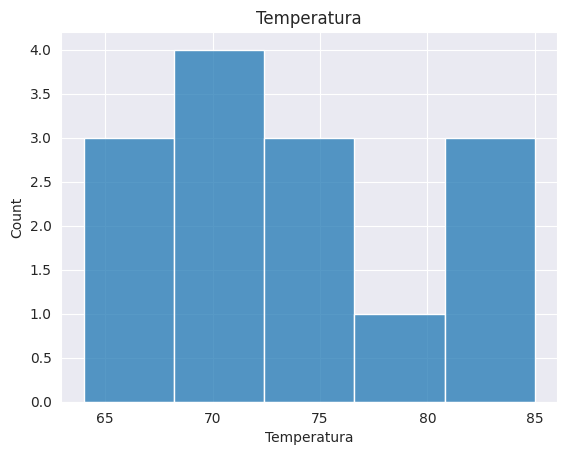

In [68]:
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

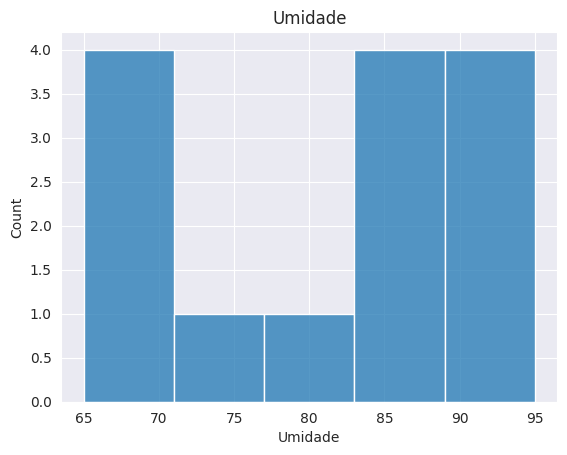

In [69]:
srn.histplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Temperatura')

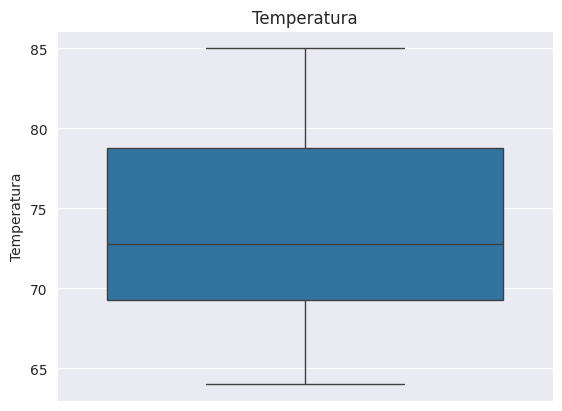

In [70]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')